In [3]:
!pip install pandas seaborn matplotlib textblob vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
df = pd.read_csv('/content/student_feedback.csv')  # Update with your file path
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [8]:
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Rename columns for easier handling (optional but helpful)
df.columns = [
    'student_id',
    'subject_knowledge',
    'concept_explanation',
    'presentations',
    'assignment_difficulty',
    'doubt_solving',
    'course_structure',
    'student_support',
    'recommendation_relevance'
]


In [10]:
df.head()


,student_id,subject_knowledge,concept_explanation,presentations,assignment_difficulty,doubt_solving,course_structure,student_support,recommendation_relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [11]:
df.dtypes

,0
student_id,int64
subject_knowledge,int64
concept_explanation,int64
presentations,int64
assignment_difficulty,int64
doubt_solving,int64
course_structure,int64
student_support,int64
recommendation_relevance,int64


In [12]:
rating_data = df.drop(columns=['student_id'])

# 1. Summary statistics for all rating columns
print("Summary Statistics:\n")
print(rating_data.describe())

Summary Statistics:

       subject_knowledge  concept_explanation  presentations  \
count        1001.000000          1001.000000    1001.000000   
mean            7.497502             6.081918       5.942058   
std             1.692998             2.597168       1.415853   
min             5.000000             2.000000       4.000000   
25%             6.000000             4.000000       5.000000   
50%             8.000000             6.000000       6.000000   
75%             9.000000             8.000000       7.000000   
max            10.000000            10.000000       8.000000   

       assignment_difficulty  doubt_solving  course_structure  \
count            1001.000000    1001.000000       1001.000000   
mean                5.430569       5.474525          5.636364   
std                 2.869046       2.874648          2.920212   
min                 1.000000       1.000000          1.000000   
25%                 3.000000       3.000000          3.000000   
50%         

In [13]:
mean_ratings = rating_data.mean().sort_values(ascending=False)
print("\nAverage Ratings (High to Low):\n")
print(mean_ratings)


Average Ratings (High to Low):

subject_knowledge           7.497502
concept_explanation         6.081918
presentations               5.942058
student_support             5.662338
course_structure            5.636364
recommendation_relevance    5.598402
doubt_solving               5.474525
assignment_difficulty       5.430569
dtype: float64


/tmp/ipython-input-2750457887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ratings.values, y=mean_ratings.index, palette="viridis")


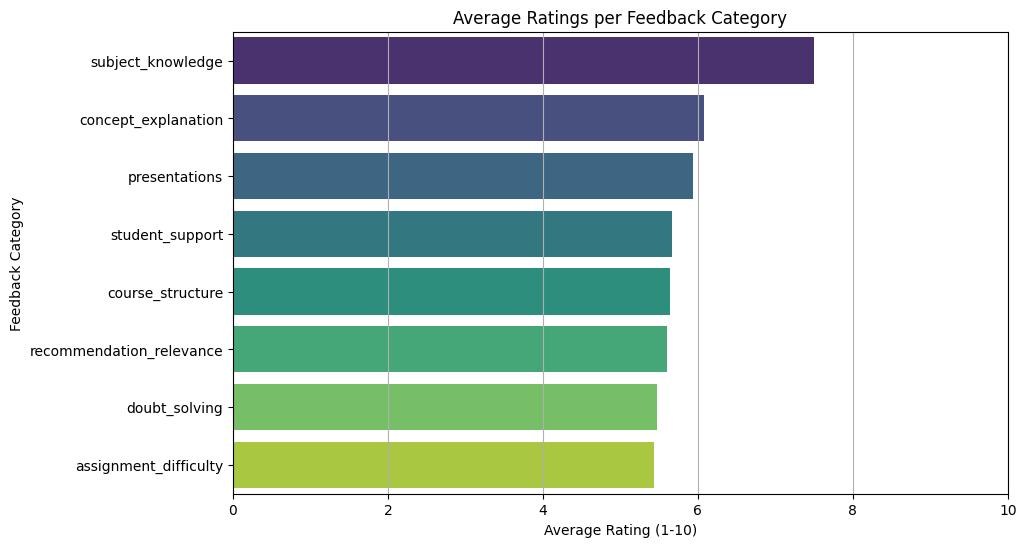

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_ratings.values, y=mean_ratings.index, palette="viridis")
plt.title('Average Ratings per Feedback Category')
plt.xlabel('Average Rating (1-10)')
plt.ylabel('Feedback Category')
plt.xlim(0, 10)
plt.grid(axis='x')
plt.show()

In [15]:
df.columns

Index(['student_id', 'subject_knowledge', 'concept_explanation',
       'presentations', 'assignment_difficulty', 'doubt_solving',
       'course_structure', 'student_support', 'recommendation_relevance'],
      dtype='object')

In [16]:
import random

# Example comments by sentiment type
positive_comments = [
    "The instructor was amazing and very clear.",
    "I really enjoyed the course!",
    "Excellent use of examples and visuals.",
    "Very supportive and knowledgeable.",
    "Would definitely recommend to others."
]

neutral_comments = [
    "It was okay, not too difficult.",
    "Some topics were easy, others were tough.",
    "Decent explanations but can improve.",
    "Presentations were average.",
    "Assignments were manageable."
]

negative_comments = [
    "Too confusing and fast-paced.",
    "Assignments were unnecessarily hard.",
    "Didn't solve doubts properly.",
    "The course was not well structured.",
    "Would not recommend this course."
]

# Create a new column with random comments
def generate_comment():
    sentiment_group = random.choices(
        ['positive', 'neutral', 'negative'],
        weights=[0.5, 0.3, 0.2]  # Adjust proportions here
    )[0]

    if sentiment_group == 'positive':
        return random.choice(positive_comments)
    elif sentiment_group == 'neutral':
        return random.choice(neutral_comments)
    else:
        return random.choice(negative_comments)

# Add the new column to your DataFrame
df['feedback_comment'] = [generate_comment() for _ in range(len(df))]

# Show a few examples
df[['feedback_comment']].head()


,feedback_comment
0,Assignments were unnecessarily hard.
1,Too confusing and fast-paced.
2,Too confusing and fast-paced.
3,The course was not well structured.
4,The course was not well structured.


In [17]:
df.head()

,student_id,subject_knowledge,concept_explanation,presentations,assignment_difficulty,doubt_solving,course_structure,student_support,recommendation_relevance,feedback_comment
0,340,5,2,7,6,9,2,1,8,Assignments were unnecessarily hard.
1,253,6,5,8,6,2,1,2,9,Too confusing and fast-paced.
2,680,7,7,6,5,4,2,3,1,Too confusing and fast-paced.
3,806,9,6,7,1,5,9,4,6,The course was not well structured.
4,632,8,10,8,4,6,6,9,9,The course was not well structured.


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment_label(comment):
    score = analyzer.polarity_scores(comment)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the comments
df['sentiment'] = df['feedback_comment'].apply(get_sentiment_label)

# Show results
df[['feedback_comment', 'sentiment']].head()

,feedback_comment,sentiment
0,Assignments were unnecessarily hard.,Negative
1,Too confusing and fast-paced.,Negative
2,Too confusing and fast-paced.,Negative
3,The course was not well structured.,Negative
4,The course was not well structured.,Negative


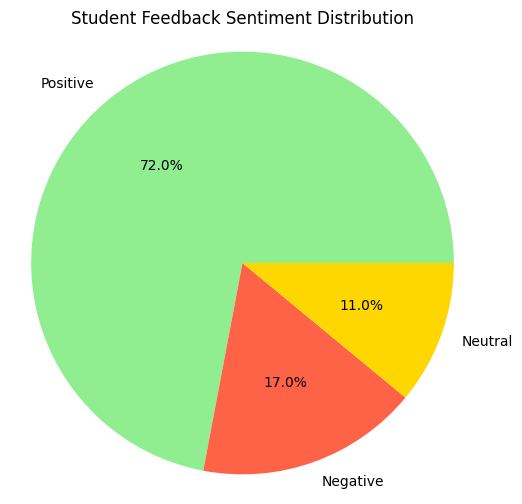

/tmp/ipython-input-4041423443.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette={'Positive': 'lightgreen', 'Neutral': 'gold', 'Negative': 'tomato'})


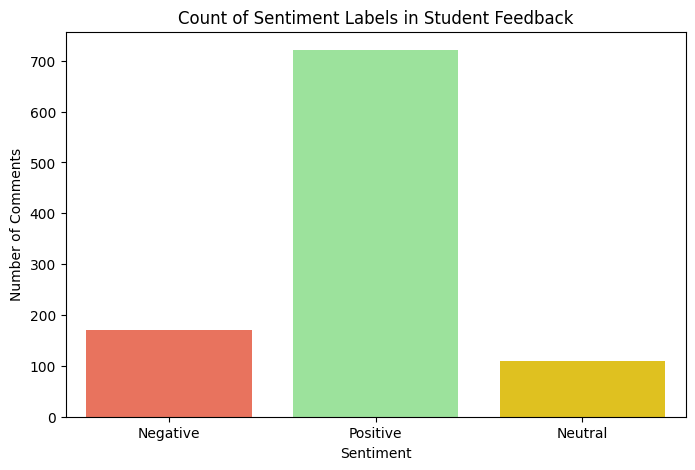

In [20]:
sentiment_counts = df['sentiment'].value_counts()

# 1. Pie Chart of Sentiment Distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'tomato', 'gold'])
plt.title('Student Feedback Sentiment Distribution')
plt.axis('equal')
plt.show()

# 2. Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette={'Positive': 'lightgreen', 'Neutral': 'gold', 'Negative': 'tomato'})
plt.title('Count of Sentiment Labels in Student Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [21]:
from wordcloud import WordCloud, STOPWORDS

# Combine all comments into a single string
all_comments = ' '.join(df['feedback_comment'])

# Set of stopwords (common words to ignore)
stopwords = set(STOPWORDS)

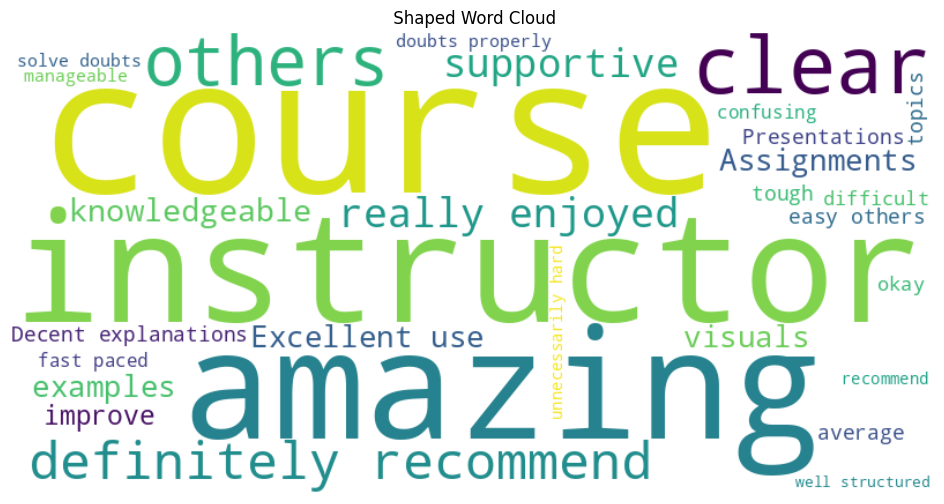

In [35]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('/content/university_mask.png'))



wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    mask=mask,
    colormap='viridis',
    contour_width=1,
    contour_color='black'

).generate(all_comments)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' Shaped Word Cloud')
plt.show()

In [27]:
!ls /content/

 laptop_mask.png.webp
'laptop-notebook-computer-flat-vector-260nw-518594842.png (1).webp'
 sample_data
 student_feedback.csv


In [36]:
import pandas as pd

rating_cols = [
 'subject_knowledge','concept_explanation','presentations',
 'assignment_difficulty','doubt_solving','course_structure',
 'student_support','recommendation_relevance'
]

# Compute average rating for each category
avg_ratings = df[rating_cols].mean().reset_index()
avg_ratings.columns = ['Feedback Area', 'Avg Rating']

print(avg_ratings)

              Feedback Area  Avg Rating
0         subject_knowledge    7.497502
1       concept_explanation    6.081918
2             presentations    5.942058
3     assignment_difficulty    5.430569
4             doubt_solving    5.474525
5          course_structure    5.636364
6           student_support    5.662338
7  recommendation_relevance    5.598402


In [37]:
dominant_sentiments = {}
for col in rating_cols:
    # Find sentiment mode (most frequent) when this category rating is considered
    mode_sentiment = df.groupby(col)['sentiment'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    # pick the sentiment at the "average" rating level if available
    dominant_sentiments[col] = df.groupby('sentiment')[col].mean().idxmax()

# Convert to dataframe
sentiment_df = pd.DataFrame(list(dominant_sentiments.items()), columns=['Feedback Area','Dominant Sentiment'])

# Merge with average ratings
summary = avg_ratings.merge(sentiment_df, on='Feedback Area')

print(summary)

              Feedback Area  Avg Rating Dominant Sentiment
0         subject_knowledge    7.497502            Neutral
1       concept_explanation    6.081918           Positive
2             presentations    5.942058           Positive
3     assignment_difficulty    5.430569           Positive
4             doubt_solving    5.474525           Positive
5          course_structure    5.636364            Neutral
6           student_support    5.662338            Neutral
7  recommendation_relevance    5.598402           Negative


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Function to clean text (remove punctuation, numbers, lowercase)
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))   # keep only letters
    return text.lower()

In [42]:
keywords_summary = {}

for col in rating_cols:
    # Filter comments where this category rating is relatively high (>=7 out of 10)
    temp = df[df[col] >= 7]['feedback_comment'].dropna().apply(clean_text)

    if not temp.empty:
        vectorizer = CountVectorizer(stop_words='english', max_features=50)
        word_counts = vectorizer.fit_transform(temp)
        word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray().sum(axis=0)))

        # Top 3 words
        top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:3]
        keywords_summary[col] = [w for w, _ in top_words]
    else:
        keywords_summary[col] = []

In [43]:
keywords_df = pd.DataFrame(
    list(keywords_summary.items()),
    columns=['Feedback Area','Top Keywords']
)

# Merge with previous summary
final_summary = summary.merge(keywords_df, on='Feedback Area')

print(final_summary)

              Feedback Area  Avg Rating Dominant Sentiment  \
0         subject_knowledge    7.497502            Neutral   
1       concept_explanation    6.081918           Positive   
2             presentations    5.942058           Positive   
3     assignment_difficulty    5.430569           Positive   
4             doubt_solving    5.474525           Positive   
5          course_structure    5.636364            Neutral   
6           student_support    5.662338            Neutral   
7  recommendation_relevance    5.598402           Negative   

                         Top Keywords  
0  [course, recommend, knowledgeable]  
1     [recommend, course, definitely]  
2        [course, recommend, amazing]  
3        [course, recommend, amazing]  
4        [course, recommend, amazing]  
5        [course, recommend, amazing]  
6        [course, recommend, amazing]  
7        [course, recommend, amazing]  


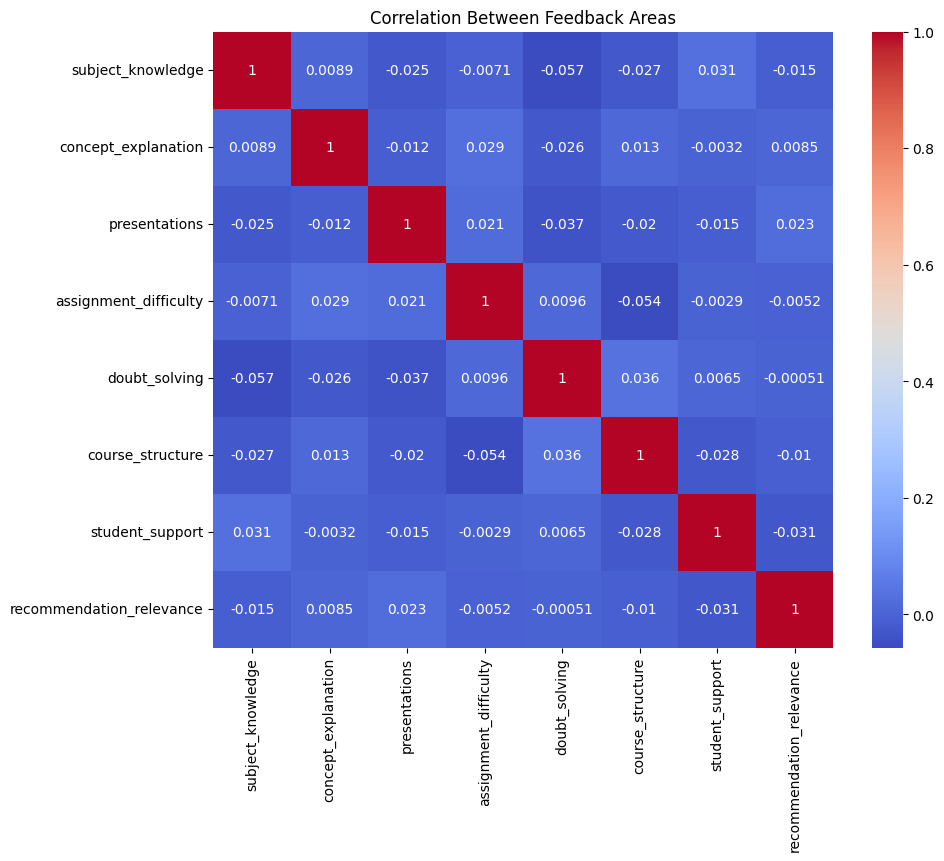

In [44]:
 plt.figure(figsize=(10,8))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Feedback Areas')
plt.show()

In [45]:
import random

/tmp/ipython-input-1768625633.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_avg.index, y=dept_avg.values, palette='magma')


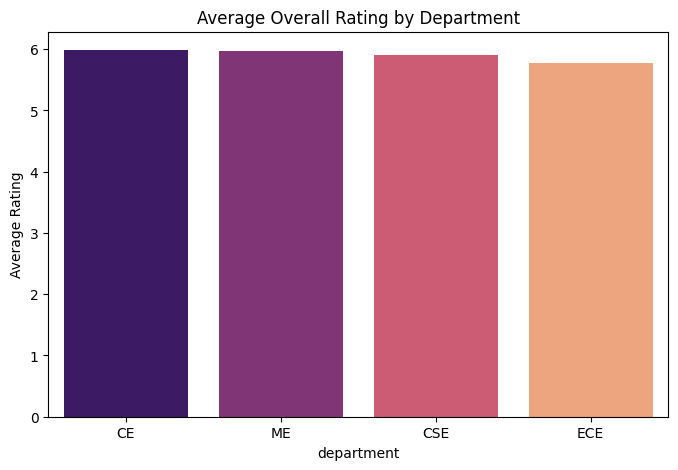

In [47]:
rating_cols = [
 'subject_knowledge','concept_explanation','presentations',
 'assignment_difficulty','doubt_solving','course_structure',
 'student_support','recommendation_relevance'
]

df['overall_rating'] = df[rating_cols].mean(axis=1)
df['department'] = random.choices(['CSE','ECE','ME','CE'], k=len(df))
dept_avg = df.groupby('department')['overall_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=dept_avg.index, y=dept_avg.values, palette='magma')
plt.title('Average Overall Rating by Department')
plt.ylabel('Average Rating')
plt.show()

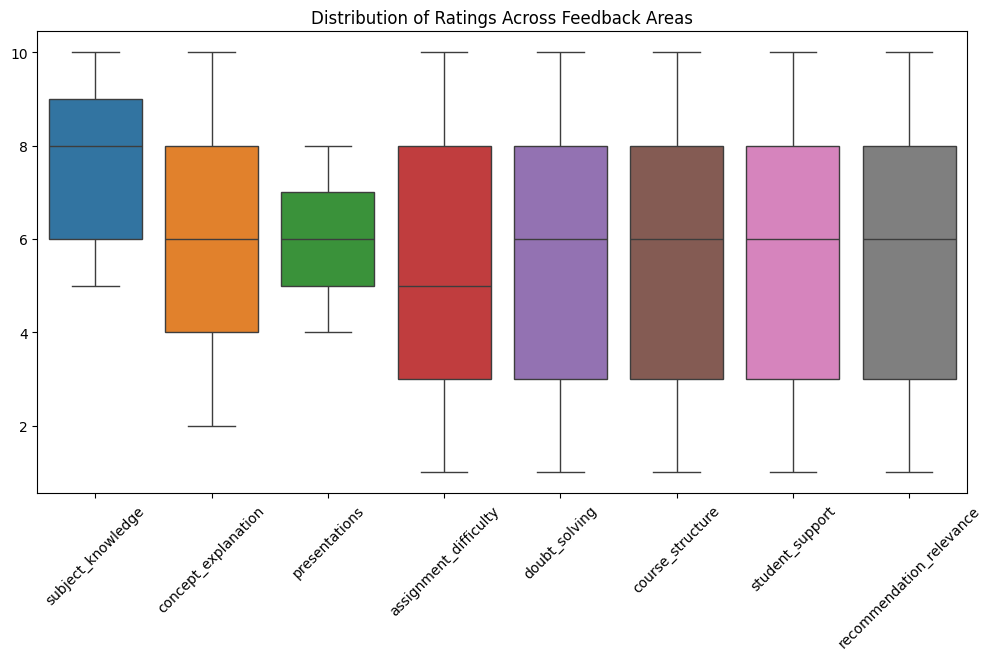

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[rating_cols])
plt.xticks(rotation=45)
plt.title('Distribution of Ratings Across Feedback Areas')
plt.show()

/tmp/ipython-input-3594263284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='overall_rating', data=df, palette={'Positive':'lightgreen','Neutral':'gold','Negative':'tomato'})


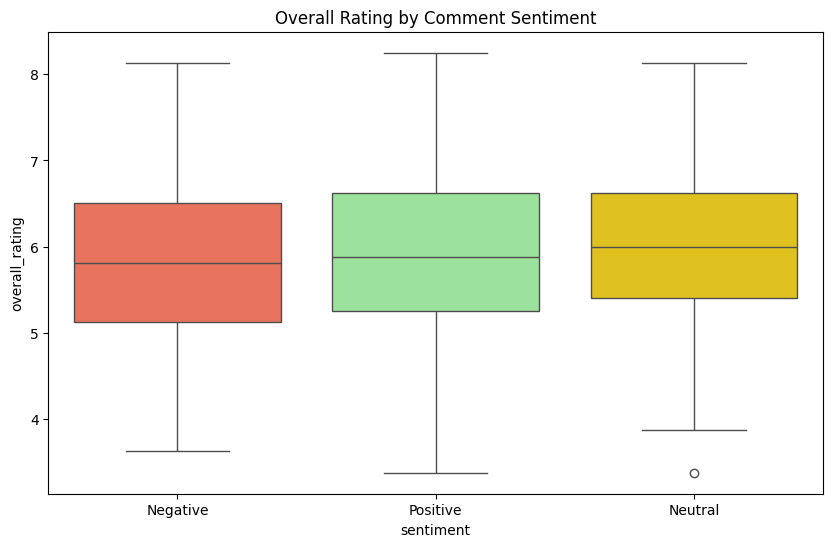

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment', y='overall_rating', data=df, palette={'Positive':'lightgreen','Neutral':'gold','Negative':'tomato'})
plt.title('Overall Rating by Comment Sentiment')
plt.show()

In [50]:
top_improvement_areas = final_summary.sort_values('Avg Rating').head(3).copy()

In [51]:
recommendations = []

for index, row in top_improvement_areas.iterrows():
    area = row['Feedback Area']
    avg = row['Avg Rating']
    sentiment = row['Dominant Sentiment']

    if sentiment == 'Negative':
        rec = f"Urgent: Improve {area.lower()} as it received low ratings and negative feedback."
    elif sentiment == 'Neutral':
        rec = f"Consider enhancing {area.lower()} to improve student satisfaction."
    else:
        rec = f"{area} is satisfactory but monitor for improvements."

    recommendations.append(rec)

top_improvement_areas['Recommendation'] = recommendations

In [52]:
top_improvement_areas[['Feedback Area','Avg Rating','Dominant Sentiment','Recommendation']]

,Feedback Area,Avg Rating,Dominant Sentiment,Recommendation
3,assignment_difficulty,5.430569,Positive,assignment_difficulty is satisfactory but moni...
4,doubt_solving,5.474525,Positive,doubt_solving is satisfactory but monitor for ...
7,recommendation_relevance,5.598402,Negative,Urgent: Improve recommendation_relevance as it...
